In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('Churn_Modelling.csv', sep = ';')

In [5]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Описание данных
Признаки:

* RowNumber – индекс строки в данных
* CustomerId – уникальный идентификатор клиента
* Surname – фамилия
* CreditScore – кредитный рейтинг
* Geography – страна проживания
* Gender – пол
* Age – возраст
* Tenure – количество недвижимости у клиента
* Balance – баланс на счёте
* NumOfProducts -количество продуктов банка, используемых клиентом
* HasCrCard – наличие кредитной карты
* IsActiveMember – активность клиента
* EstimatedSalary – предполагаемая зарплата

Целевой (искомый) признак:

* Exited – факт ухода клиента

In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Пропущенных значений нет, типы данных - float64, int64, object

In [8]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке RowNumber = 0
Кол-во пропусков в колонке CustomerId = 0
Кол-во пропусков в колонке Surname = 0
Кол-во пропусков в колонке CreditScore = 0
Кол-во пропусков в колонке Geography = 0
Кол-во пропусков в колонке Gender = 0
Кол-во пропусков в колонке Age = 0
Кол-во пропусков в колонке Tenure = 0
Кол-во пропусков в колонке Balance = 0
Кол-во пропусков в колонке NumOfProducts = 0
Кол-во пропусков в колонке HasCrCard = 0
Кол-во пропусков в колонке IsActiveMember = 0
Кол-во пропусков в колонке EstimatedSalary = 0
Кол-во пропусков в колонке Exited = 0


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [12]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,5000.5000,15690940.5694,650.5288,38.9218,5.0128,76485.8893,1.5302,0.7055,0.5151,100090.2399,0.2037
std,2886.8957,71936.1861,96.6533,10.4878,2.8922,62397.4052,0.5817,0.4558,0.4998,57510.4928,0.4028
min,1.0000,15565701.0000,350.0000,18.0000,0.0000,0.0000,1.0000,0.0000,0.0000,11.5800,0.0000
25%,2500.7500,15628528.2500,584.0000,32.0000,3.0000,0.0000,1.0000,0.0000,0.0000,51002.1100,0.0000
50%,5000.5000,15690738.0000,652.0000,37.0000,5.0000,97198.5400,1.0000,1.0000,1.0000,100193.9150,0.0000
75%,7500.2500,15753233.7500,718.0000,44.0000,7.0000,127644.2400,2.0000,1.0000,1.0000,149388.2475,0.0000
max,10000.0000,15815690.0000,850.0000,92.0000,10.0000,250898.0900,4.0000,1.0000,1.0000,199992.4800,1.0000


In [13]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: xlabel='Exited'>

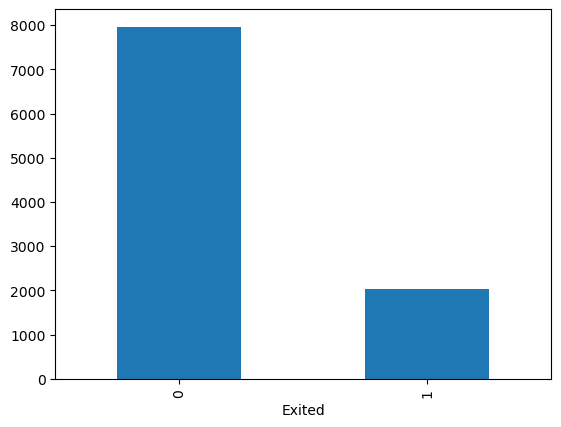

In [14]:
df['Exited'].value_counts(normalize=False).plot.bar()

<Axes: ylabel='proportion'>

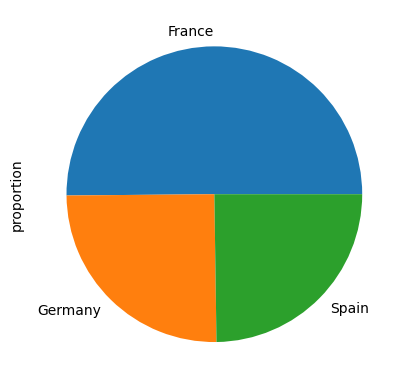

In [15]:
df['Geography'].value_counts(normalize=True).plot.pie()

In [16]:
df['Age'].nunique()

70

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

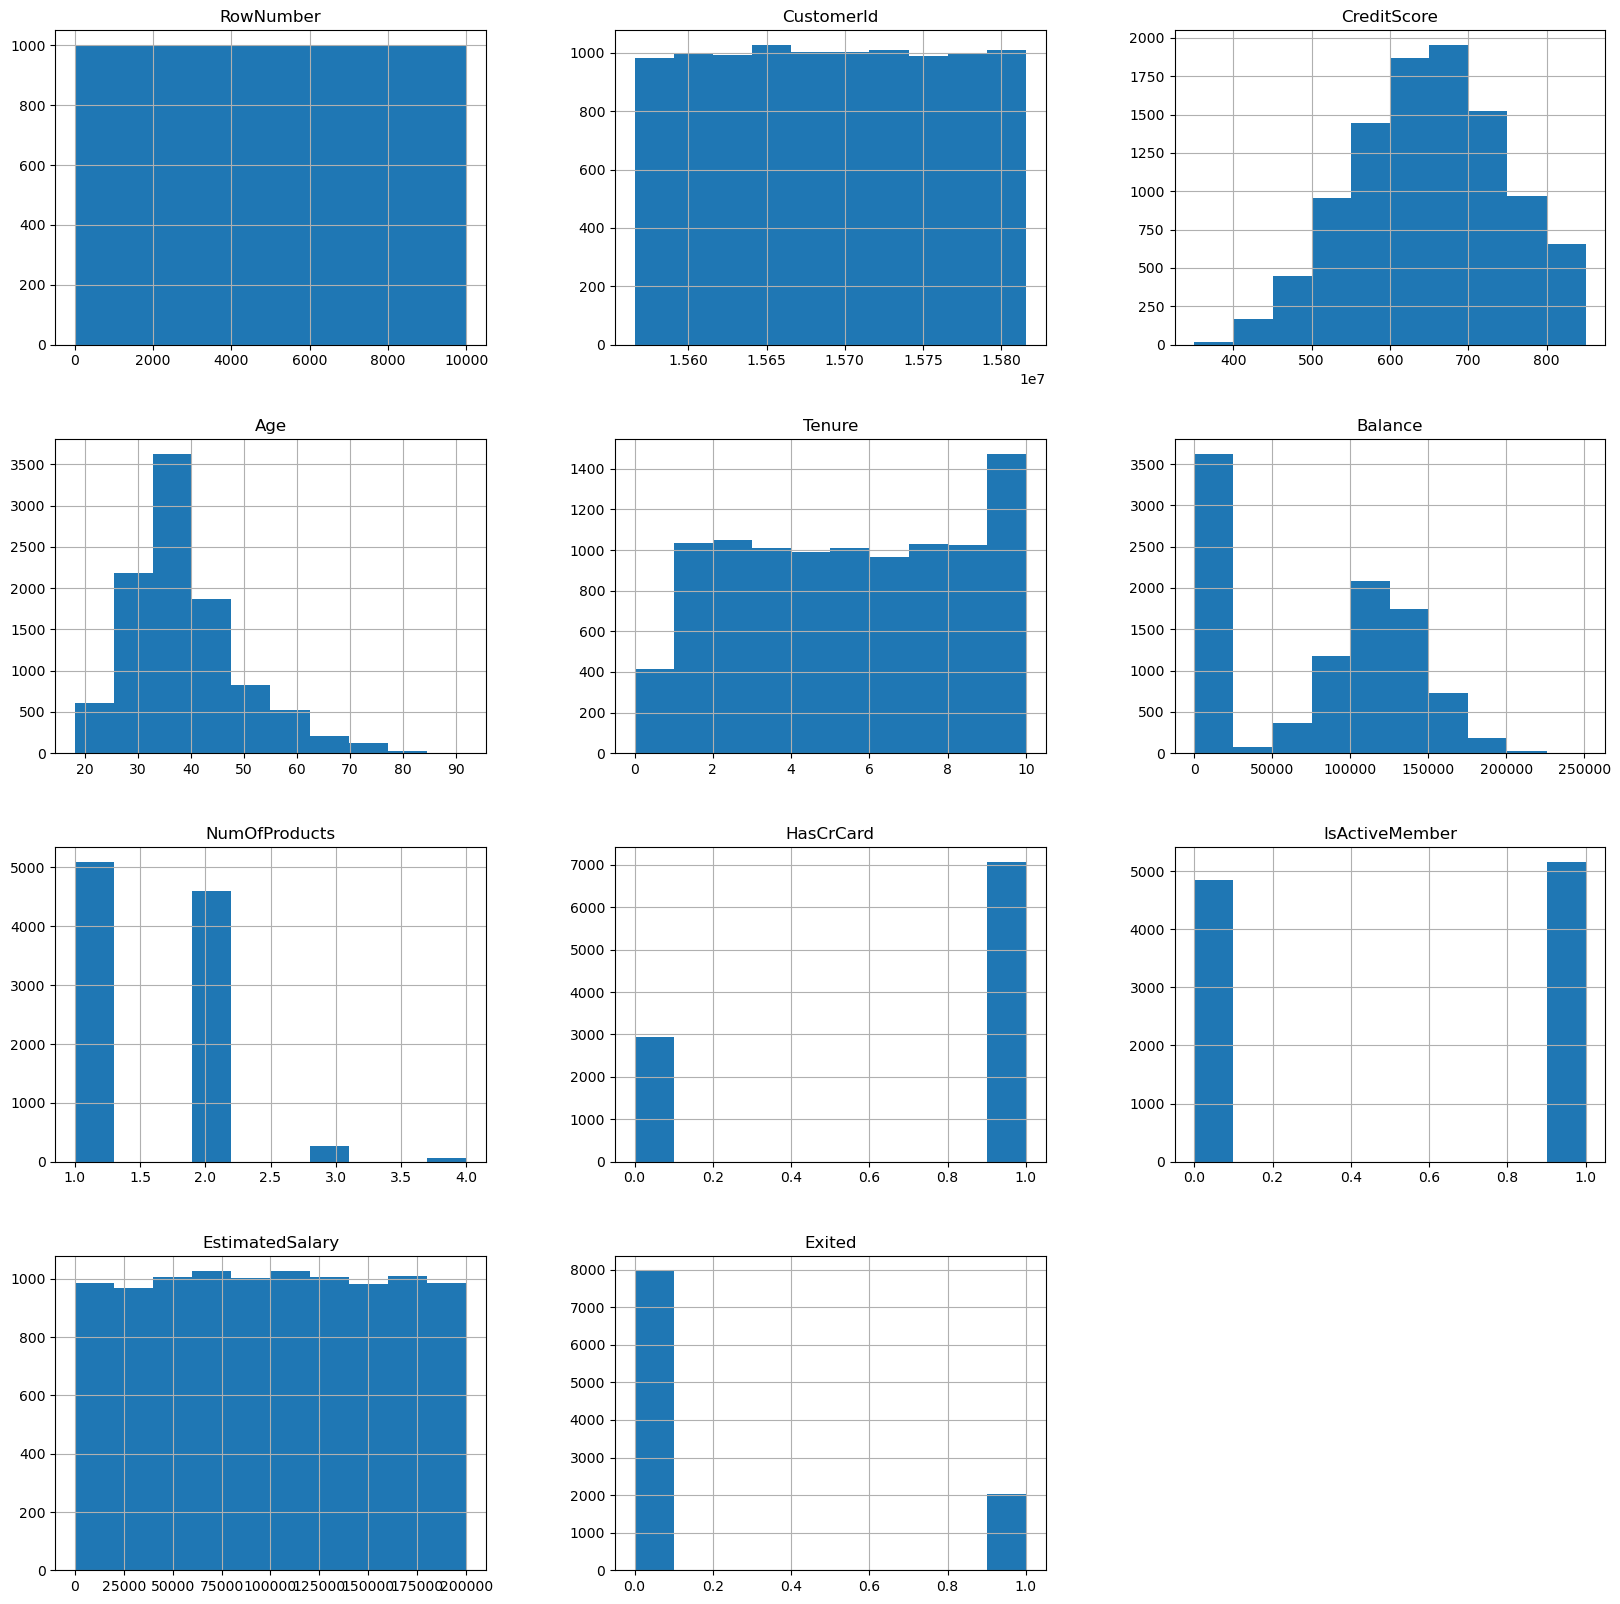

In [17]:
df.hist(figsize=(20,20))

<Axes: >

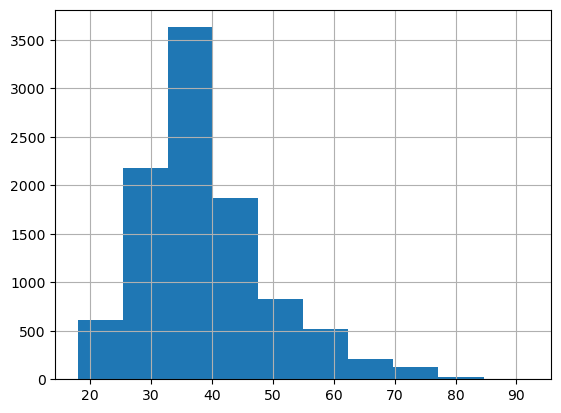

In [18]:
df['Age'].hist()

<Axes: ylabel='Age'>

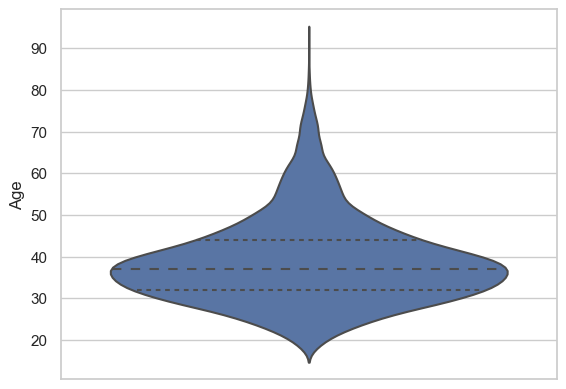

In [19]:
# применяем тему со светлыми линиями сетки
sns.set_theme(style="whitegrid")

# строим диаграмму violin plot ("скрипичная диаграмма")
sns.violinplot(y=df["Age"], inner="quartile")

In [20]:
# список признаков для анализа
features_eda = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_num']

In [21]:
# создание новой колонки Geography_num и замена символьных значений на целочисленные
df['Geography_num'] = df['Geography']

d = {'France':0, 'Spain':1, 'Germany':2}
df['Geography_num'] = df['Geography_num'].map(d)

In [22]:
df['Gender']= df['Gender'].map({'Male':0, 'Female':1})

In [23]:
df['Gender'].unique()

array([1, 0], dtype=int64)

<Axes: >

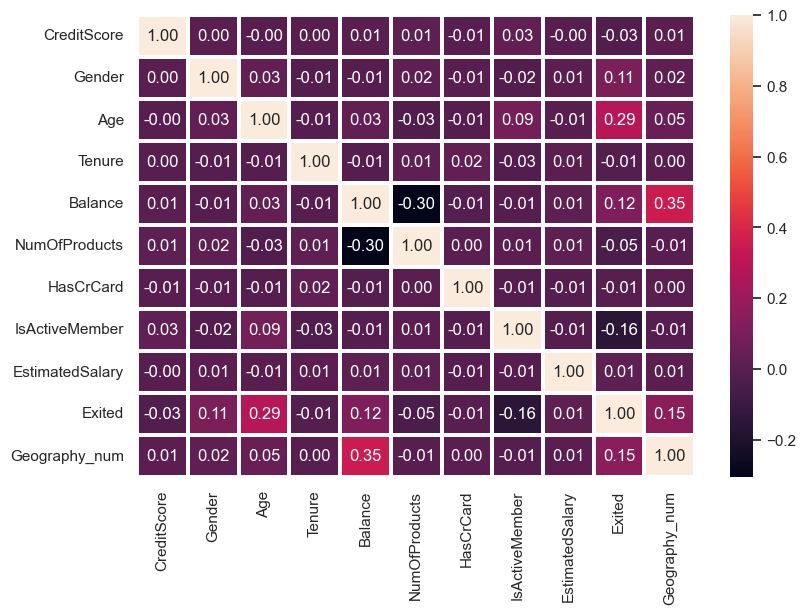

In [24]:

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(df[features_eda].corr(), annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

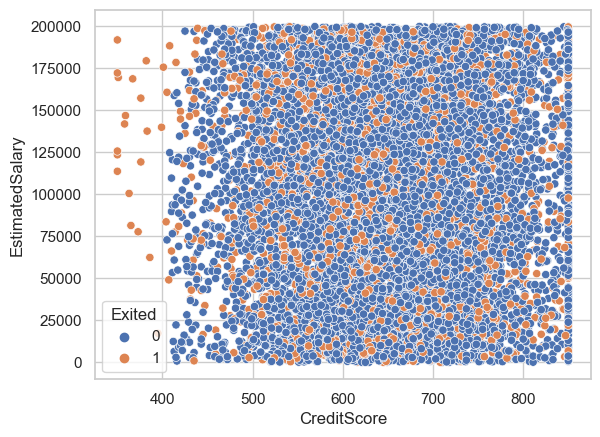

In [25]:
sns.scatterplot(data=df, x="CreditScore", y="EstimatedSalary", hue="Exited")

<Axes: xlabel='NumOfProducts', ylabel='Balance'>

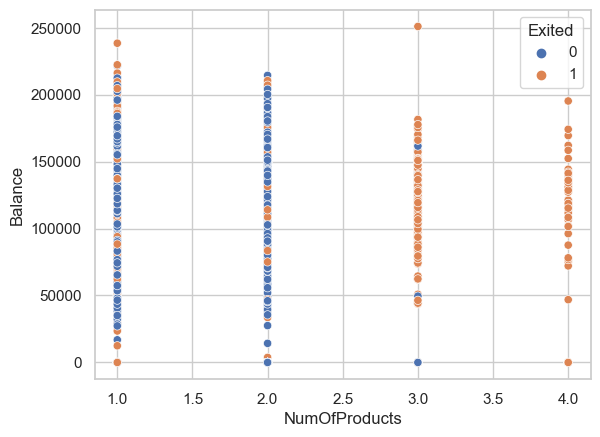

In [26]:
sns.scatterplot(data=df, x="NumOfProducts", y="Balance", hue="Exited")

<Axes: xlabel='Exited', ylabel='Age'>

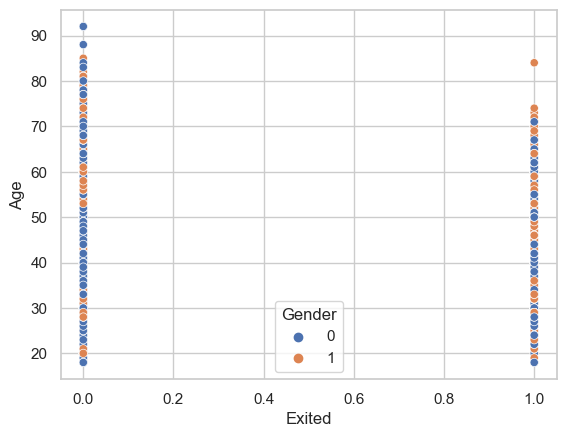

In [27]:
sns.scatterplot(data=df, x="Exited", y="Age", hue="Gender")

<Axes: xlabel='Geography_num', ylabel='Balance'>

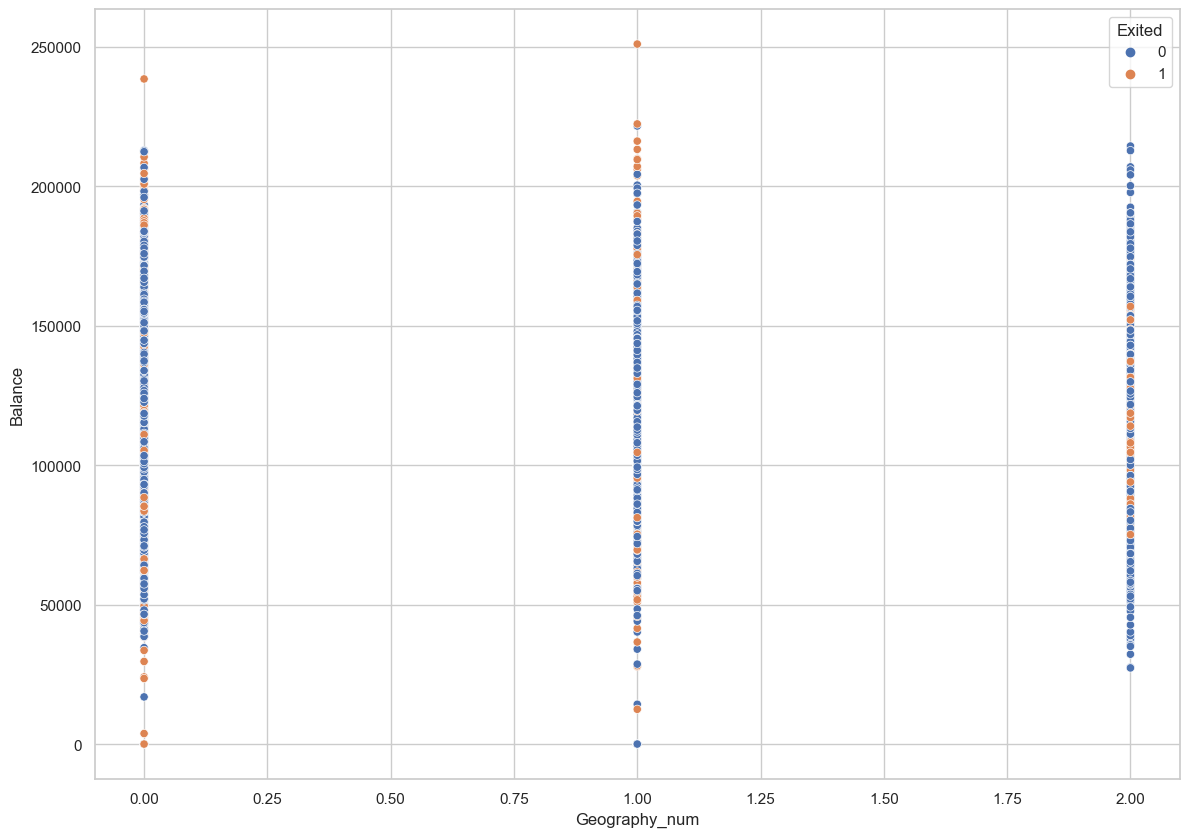

In [28]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x="Geography_num", y="Balance", hue="Exited")

C:\Users\noutb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


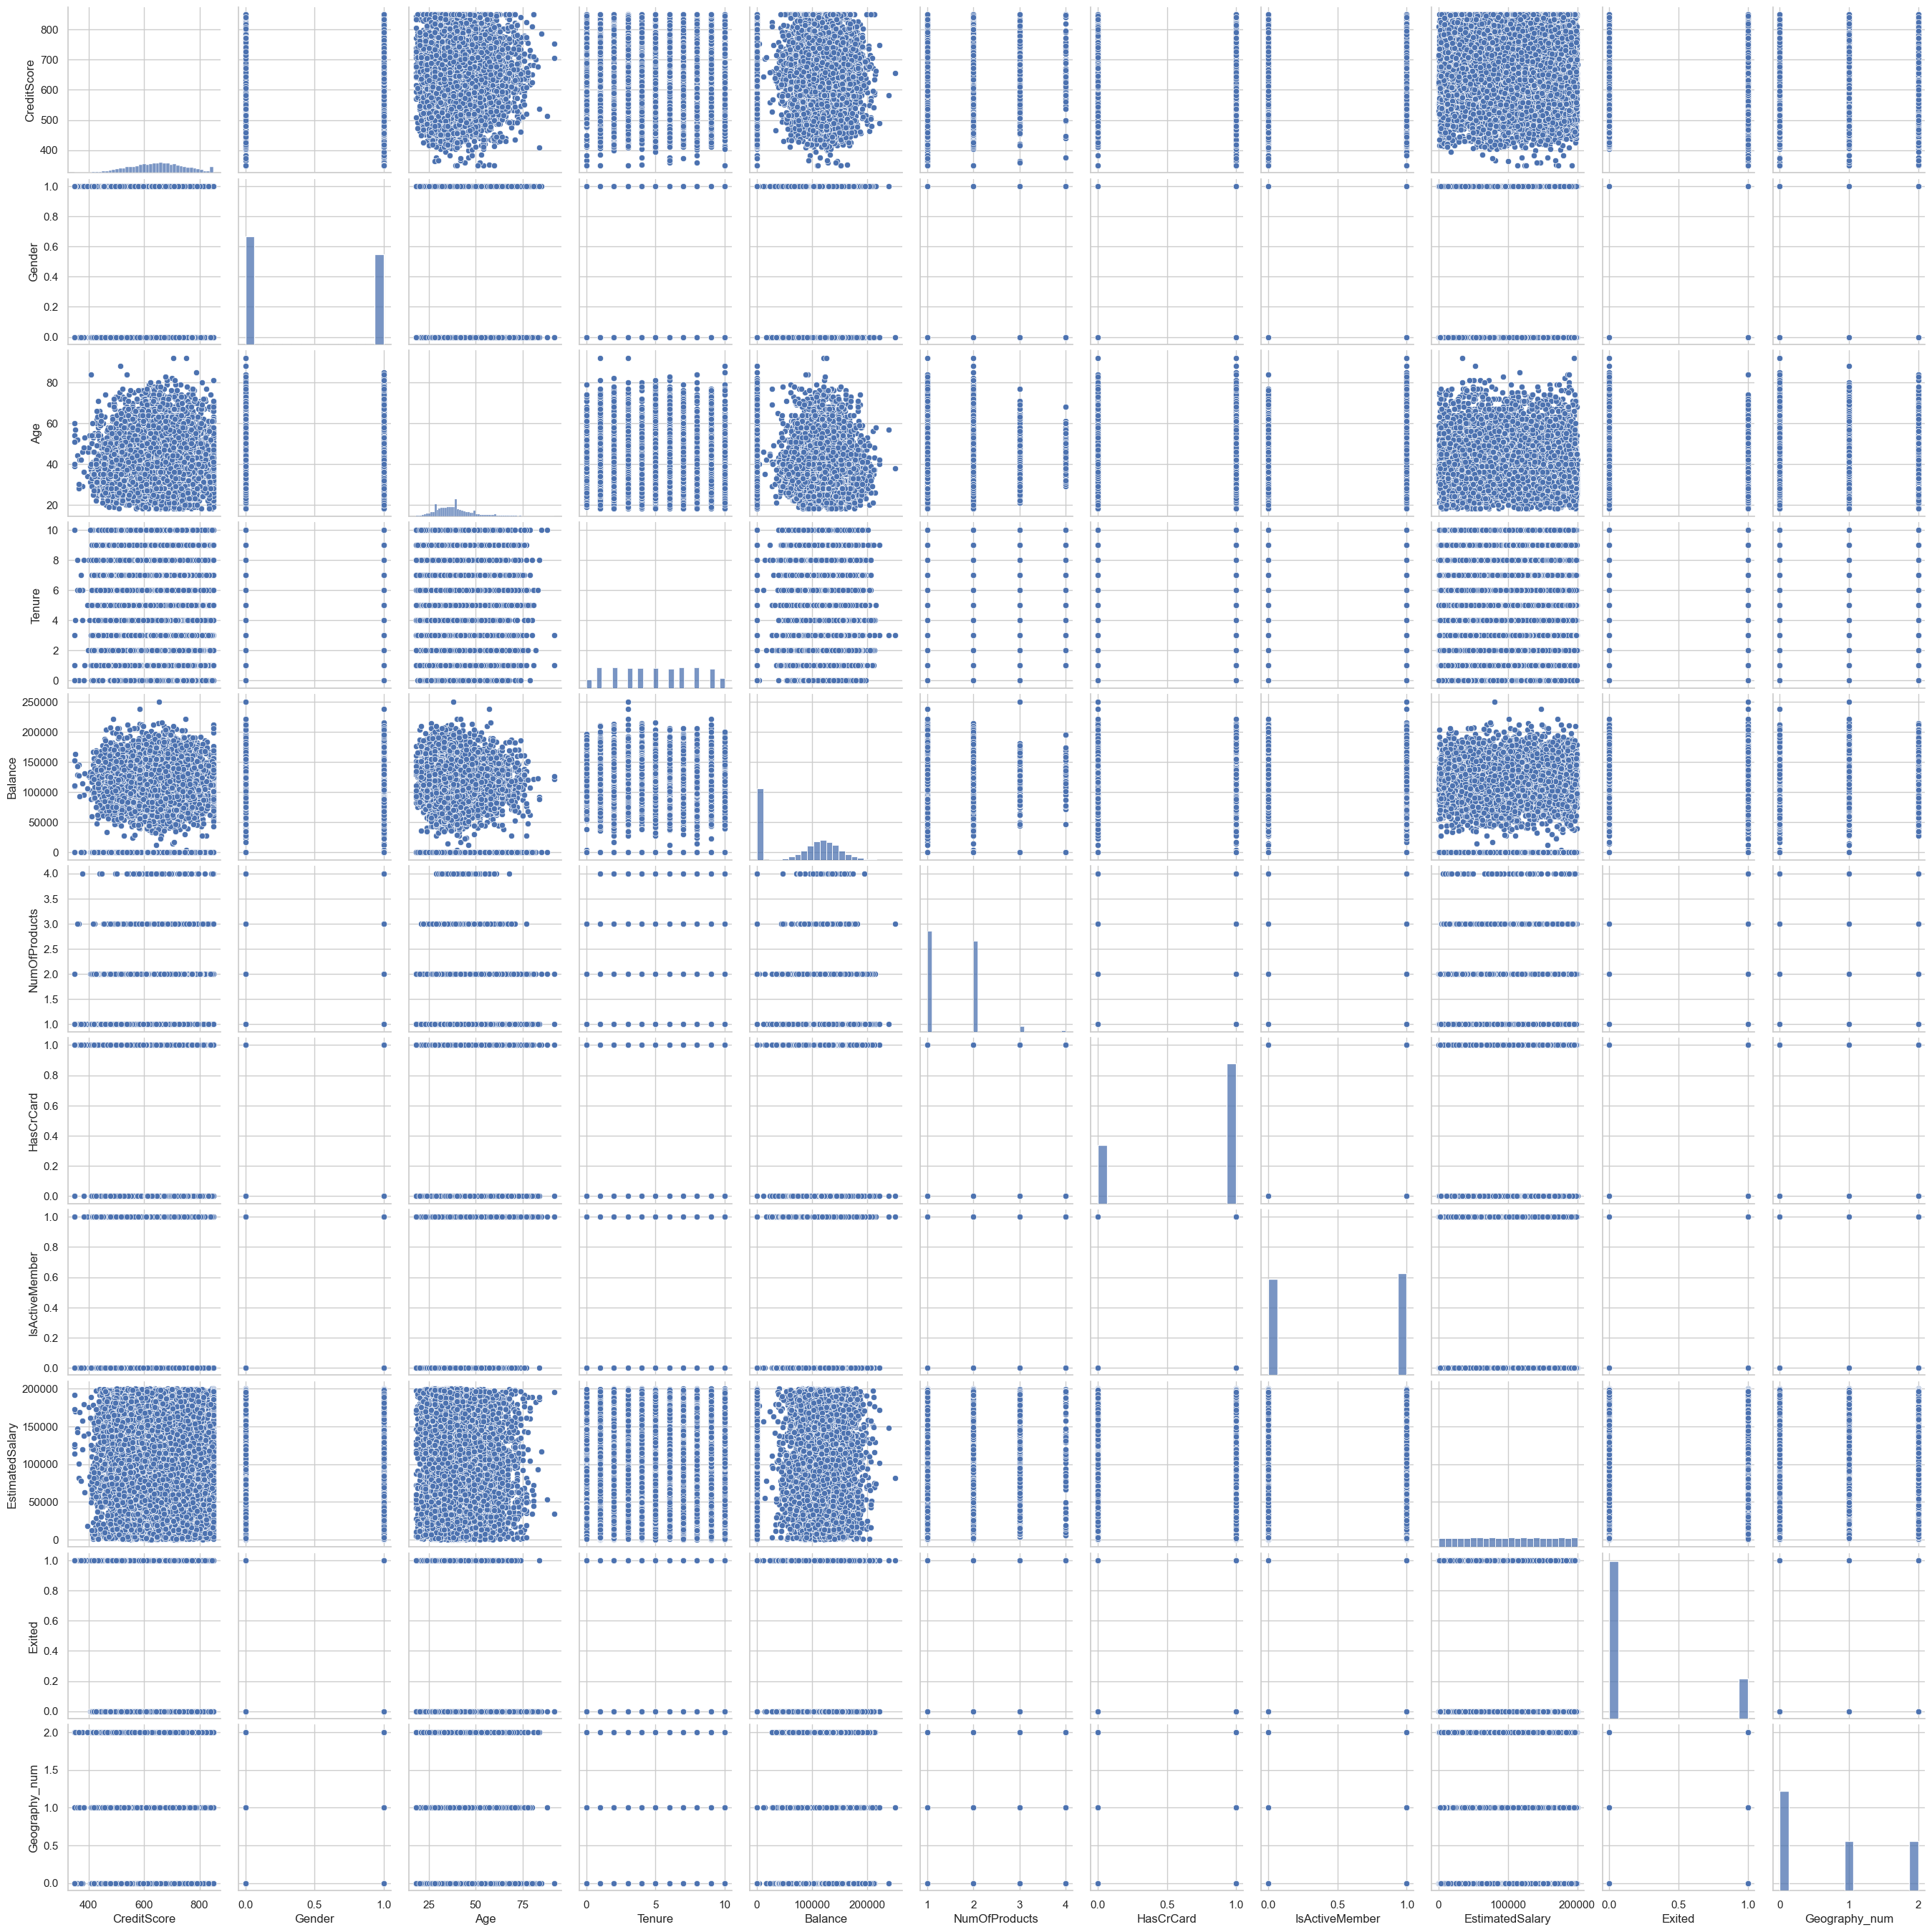

In [29]:
sns.pairplot(df[features_eda])

<Axes: xlabel='NumOfProducts', ylabel='EstimatedSalary'>

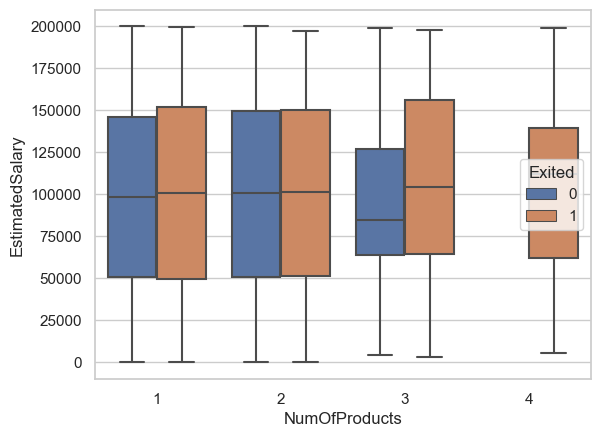

In [30]:
sns.boxplot(data=df, y="EstimatedSalary", x="NumOfProducts", hue="Exited")

In [31]:
# средний баланс в разрезе кол-ва продуктов
df.groupby('NumOfProducts')['Balance'].mean()

NumOfProducts
1   98551.8706
2   51879.1458
3   75458.3282
4   93733.1350
Name: Balance, dtype: float64

<Axes: xlabel='NumOfProducts'>

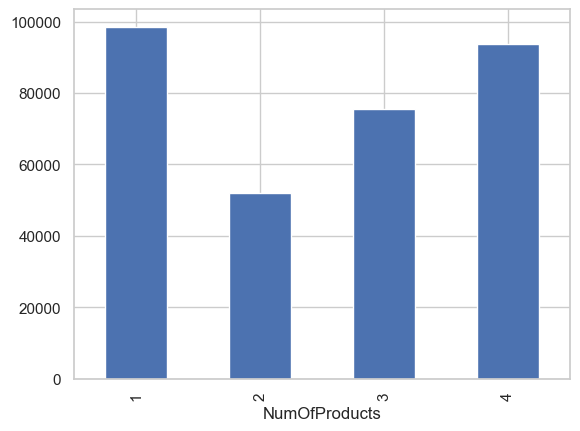

In [32]:
df.groupby('NumOfProducts')['Balance'].mean().plot.bar()

## Предварительная обработка данных (preprocessing)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Geography_num    10000 non-null  int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 1.1+ MB


In [34]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
0,1,15634602,Hargrave,619,France,1,42,2,0.0000,1,1,1,101348.8800,1,0
1,2,15647311,Hill,608,Spain,1,41,1,83807.8600,1,0,1,112542.5800,0,1
2,3,15619304,Onio,502,France,1,42,8,159660.8000,3,1,0,113931.5700,1,0
3,4,15701354,Boni,699,France,1,39,1,0.0000,2,0,0,93826.6300,0,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.8200,1,1,1,79084.1000,0,1
5,6,15574012,Chu,645,Spain,0,44,8,113755.7800,2,1,0,149756.7100,1,1
6,7,15592531,Bartlett,822,France,0,50,7,0.0000,2,1,1,10062.8000,0,0
7,8,15656148,Obinna,376,Germany,1,29,4,115046.7400,4,1,0,119346.8800,1,2
8,9,15792365,He,501,France,0,44,4,142051.0700,2,0,1,74940.5000,0,0
9,10,15592389,H?,684,France,0,27,2,134603.8800,1,1,1,71725.7300,0,0


есть некорректные фамилии, но признак в предсказании использоваться не будет, поэтому оставляем

In [35]:
numeric_columns = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age']

In [36]:
df[numeric_columns].describe()

,CreditScore,Balance,EstimatedSalary,Age
count,10000.0000,10000.0000,10000.0000,10000.0000
mean,650.5288,76485.8893,100090.2399,38.9218
std,96.6533,62397.4052,57510.4928,10.4878
min,350.0000,0.0000,11.5800,18.0000
25%,584.0000,0.0000,51002.1100,32.0000
50%,652.0000,97198.5400,100193.9150,37.0000
75%,718.0000,127644.2400,149388.2475,44.0000
max,850.0000,250898.0900,199992.4800,92.0000


In [37]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Geography
geography_cols = pd.get_dummies(df["Geography"], dtype=int)
geography_cols.head()


,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


### Формирование дата-сета для обучения моделей

In [38]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary']

In [39]:
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([df[features_names], geography_cols], axis = 1)
X.shape

(10000, 12)

In [40]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.0000,1,1,1,101348.8800,1,0,0
1,608,1,41,1,83807.8600,1,0,1,112542.5800,0,0,1
2,502,1,42,8,159660.8000,3,1,0,113931.5700,1,0,0
3,699,1,39,1,0.0000,2,0,0,93826.6300,1,0,0
4,850,1,43,2,125510.8200,1,1,1,79084.1000,0,0,1


In [41]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['Exited']

In [42]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

### Modelling

In [43]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6700, 12) (3300, 12) (6700,) (3300,)


In [45]:
from sklearn.metrics import accuracy_score

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

## KNeighborsClassifier (Классификация ближайших соседей)

In [47]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [48]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [51]:
knn_train_predict = knn.predict(X_train)


print('train accuracy: ', accuracy_score(y_train, knn_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, knn_pred_test, normalize=True))

train accuracy:  0.815820895522388
test accuracy:  0.769090909090909


In [52]:
knn_accuracy = accuracy_score(y_test, knn_pred_test, normalize=True)

In [53]:
cm = confusion_matrix(y_test, knn_pred_test)
cm

array([[2476,  181],
       [ 581,   62]], dtype=int64)

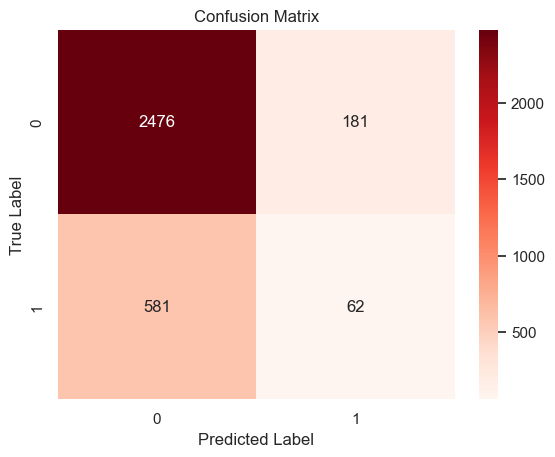

In [54]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [55]:
print('test mean_squared_error: ', mean_squared_error(y_test, knn_pred_test))
print('test mean_absolute_error: ', mean_absolute_error(y_test, knn_pred_test))

test mean_squared_error:  0.2309090909090909
test mean_absolute_error:  0.2309090909090909


In [56]:
print('test precision_score: ', precision_score(y_test, knn_pred_test))

test precision_score:  0.2551440329218107


In [57]:
print('test recall_score: ', recall_score(y_test, knn_pred_test))

test recall_score:  0.09642301710730948


In [58]:
print('test f1_score: ', f1_score(y_test, knn_pred_test))

test f1_score:  0.1399548532731377


In [59]:
print(classification_report( y_test, knn_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2657
           1       0.26      0.10      0.14       643

    accuracy                           0.77      3300
   macro avg       0.53      0.51      0.50      3300
weighted avg       0.70      0.77      0.73      3300



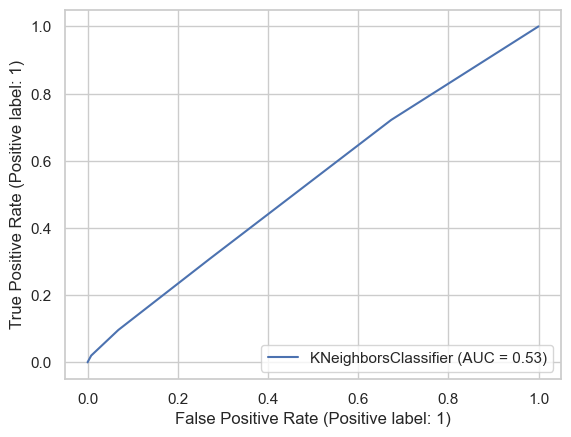

In [60]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)


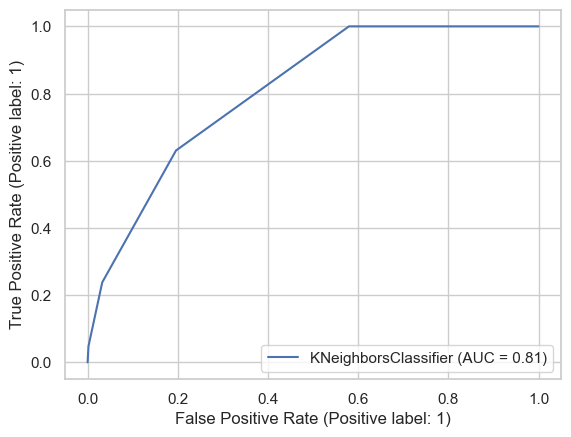

In [61]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_train, y_train)

In [62]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, knn_pred_test, average='macro')

0.5141505375337074

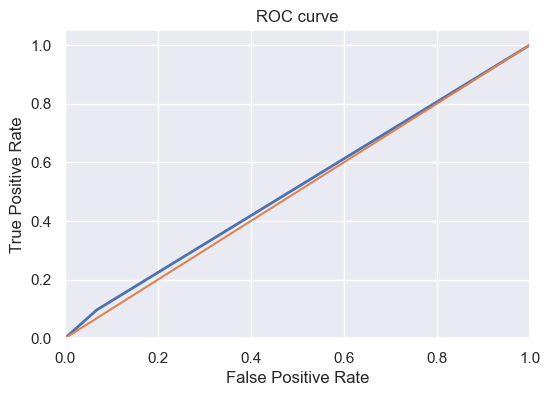

In [63]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_test, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

## Метод опорных векторов (SVM)

In [64]:
svc = SVC()

In [65]:
svc.fit(X_train, y_train)

SVC()

In [66]:
svc_pred_test = svc.predict(X_test)
display(svc_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [67]:
svc_train_predict = svc.predict(X_train)
print('train accuracy: ', accuracy_score(y_train, svc_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, svc_pred_test, normalize=True))

train accuracy:  0.7919402985074627
test accuracy:  0.8051515151515152


In [68]:
svc_accuracy = accuracy_score(y_test, svc_pred_test, normalize=True)

In [69]:
cm = confusion_matrix(y_test, svc_pred_test)
cm

array([[2657,    0],
       [ 643,    0]], dtype=int64)

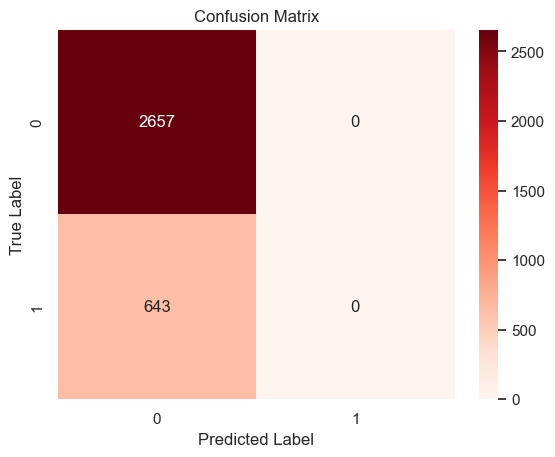

In [70]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [71]:
print('test mean_squared_error: ', mean_squared_error(y_test, svc_pred_test))
print('test mean_absolute_error: ', mean_absolute_error(y_test, svc_pred_test))

test mean_squared_error:  0.19484848484848485
test mean_absolute_error:  0.19484848484848485


In [72]:
print('test precision_score: ', precision_score(y_test, svc_pred_test))

test precision_score:  0.0


C:\Users\noutb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
print('test recall_score: ', recall_score(y_test, svc_pred_test))

test recall_score:  0.0


In [74]:
print('test f1_score: ', f1_score(y_test, svc_pred_test))

test f1_score:  0.0


In [75]:
print(classification_report( y_test, svc_pred_test))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2657
           1       0.00      0.00      0.00       643

    accuracy                           0.81      3300
   macro avg       0.40      0.50      0.45      3300
weighted avg       0.65      0.81      0.72      3300



C:\Users\noutb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noutb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noutb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


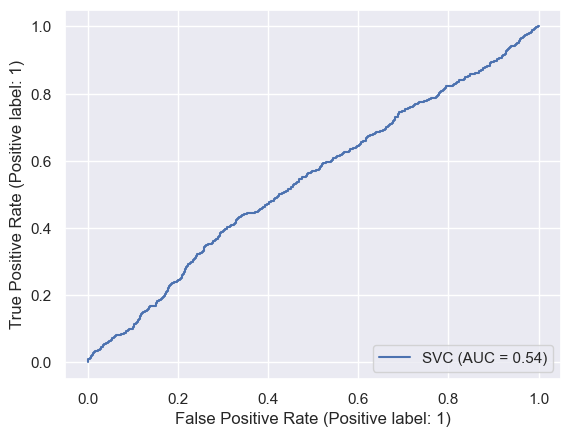

In [76]:
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)

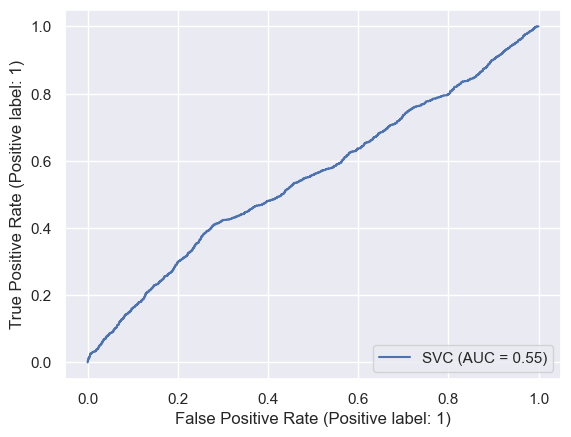

In [77]:
svc_disp = RocCurveDisplay.from_estimator(svc, X_train, y_train)

In [78]:
roc_auc_score(y_test, svc_pred_test, average='macro')

0.5

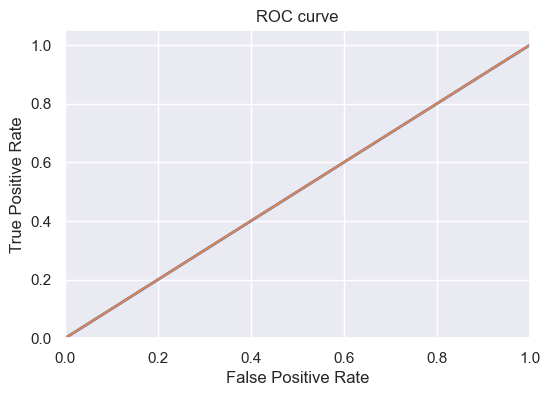

In [143]:
sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test,svc_pred_test, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

## DecisionTreeClasifier(Дерево решений)

In [79]:
dtr = DecisionTreeClassifier()

In [80]:
dtr.fit(X_train,y_train)

DecisionTreeClassifier()

In [81]:
dtr_pred_test = dtr.predict(X_test)
display(dtr_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [82]:
dtr_train_predict = dtr.predict(X_train)
print('train accuracy: ', accuracy_score(y_train, dtr_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, dtr_pred_test, normalize=True))

train accuracy:  1.0
test accuracy:  0.7824242424242425


In [83]:
dtr_accuracy = accuracy_score(y_test, dtr_pred_test, normalize=True)

In [84]:
cm = confusion_matrix(y_test, dtr_pred_test)
cm

array([[2270,  387],
       [ 331,  312]], dtype=int64)

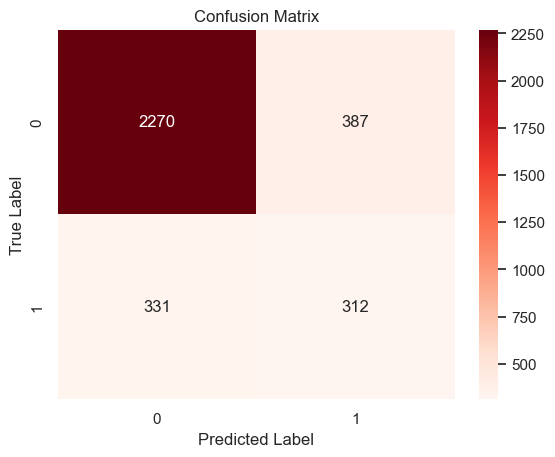

In [85]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [86]:
print('test mean_squared_error: ', mean_squared_error(y_test, dtr_pred_test))
print('test mean_absolute_error: ', mean_absolute_error(y_test, dtr_pred_test))

test mean_squared_error:  0.2175757575757576
test mean_absolute_error:  0.2175757575757576


In [87]:
print('test precision_score: ', precision_score(y_test, dtr_pred_test))

test precision_score:  0.44635193133047213


In [88]:
print('test recall_score: ', recall_score(y_test, dtr_pred_test))

test recall_score:  0.48522550544323484


In [89]:
print('test f1_score: ', f1_score(y_test, dtr_pred_test))

test f1_score:  0.46497764530551416


In [90]:
print(classification_report( y_test, dtr_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2657
           1       0.45      0.49      0.46       643

    accuracy                           0.78      3300
   macro avg       0.66      0.67      0.66      3300
weighted avg       0.79      0.78      0.79      3300



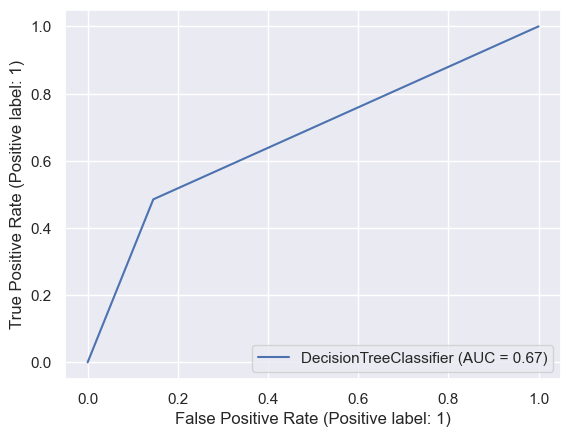

In [91]:
dtr_disp = RocCurveDisplay.from_estimator(dtr, X_test, y_test)

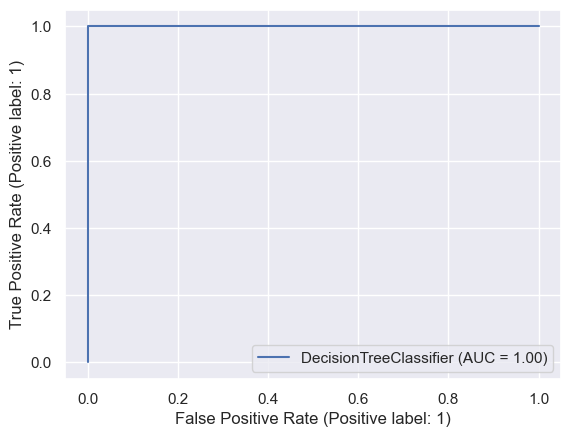

In [92]:
dtr_disp = RocCurveDisplay.from_estimator(dtr, X_train, y_train)

In [93]:
roc_auc_score(y_test, dtr_pred_test, average='macro')

0.6697862566734428

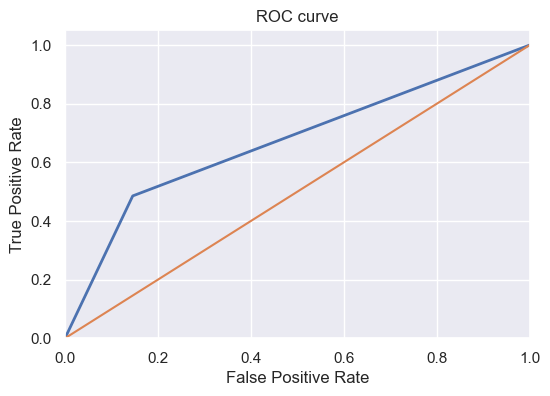

In [142]:
sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, dtr_pred_test, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

## Random Forest Classifier (Классификатор дерева решений)

In [94]:
rfc = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

In [95]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, n_jobs=-1, random_state=42)

In [96]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [97]:
rfc_train_predict = rfc.predict(X_train)
print('train accuracy: ', accuracy_score(y_train, rfc_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, rfc_pred_test, normalize=True))

train accuracy:  0.8916417910447761
test accuracy:  0.8712121212121212


In [98]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test, normalize=True)

In [99]:
cm = confusion_matrix(y_test, rfc_pred_test)
cm

array([[2587,   70],
       [ 355,  288]], dtype=int64)

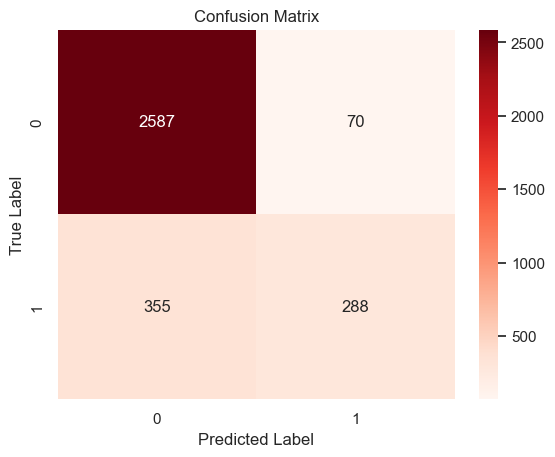

In [100]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [101]:
print('test mean_squared_error: ', mean_squared_error(y_test, rfc_pred_test))
print('test mean_absolute_error: ', mean_absolute_error(y_test, rfc_pred_test))

test mean_squared_error:  0.12878787878787878
test mean_absolute_error:  0.12878787878787878


In [102]:
print('test precision_score: ', precision_score(y_test, rfc_pred_test))

test precision_score:  0.8044692737430168


In [103]:
print('test recall_score: ', recall_score(y_test, rfc_pred_test))

test recall_score:  0.447900466562986


In [104]:
print('test f1_score: ', f1_score(y_test, rfc_pred_test))

test f1_score:  0.5754245754245755


In [105]:
print(classification_report( y_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.80      0.45      0.58       643

    accuracy                           0.87      3300
   macro avg       0.84      0.71      0.75      3300
weighted avg       0.86      0.87      0.86      3300



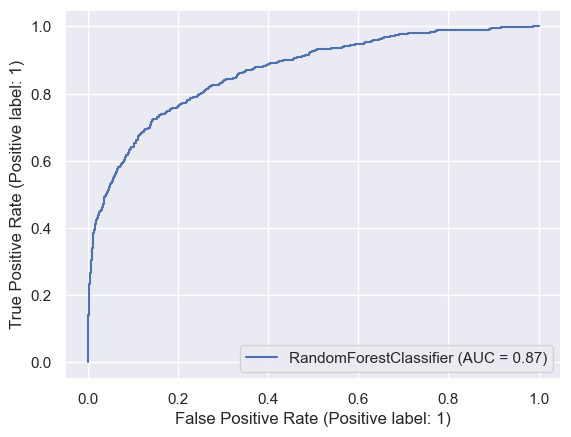

In [106]:
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

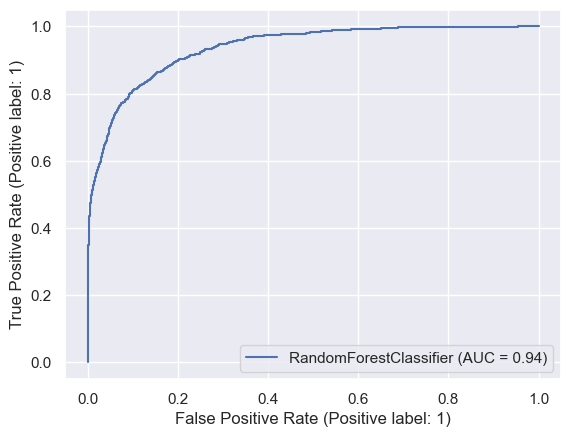

In [107]:
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_train, y_train)

In [108]:
roc_auc_score(y_test, rfc_pred_test, average='macro')

0.7107774820583089

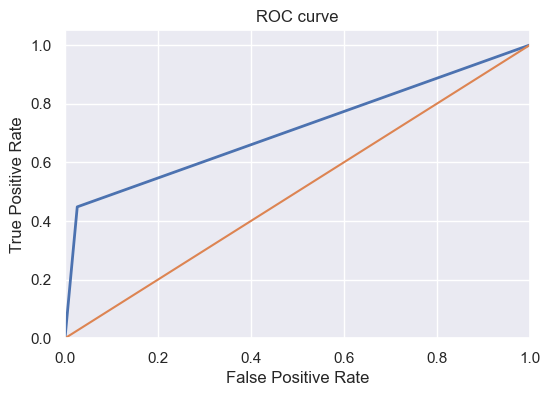

In [141]:
sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, rfc_pred_test, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

## Gaussian Naive Bayes (Наивный Байесовский Класификатор)

In [109]:
gnb =  GaussianNB()

In [110]:
gnb.fit(X_train,y_train)

GaussianNB()

In [111]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [112]:
gnb_train_predict = gnb.predict(X_train)
print('train accuracy: ', accuracy_score(y_train, gnb_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, gnb_pred_test, normalize=True))

train accuracy:  0.7829850746268656
test accuracy:  0.7951515151515152


In [113]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test, normalize=True)

In [114]:
cm = confusion_matrix(y_test, gnb_pred_test)
cm

array([[2570,   87],
       [ 589,   54]], dtype=int64)

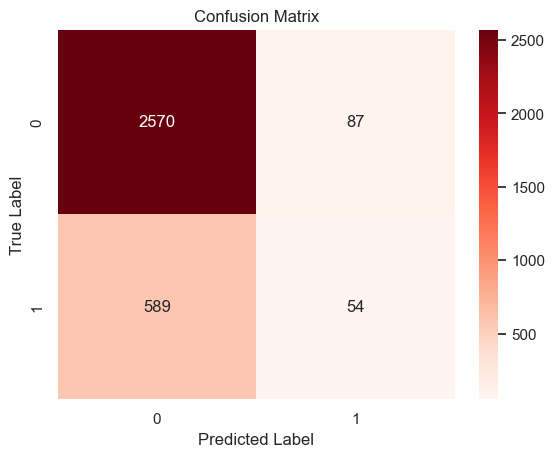

In [115]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [116]:
print('test mean_squared_error: ', mean_squared_error(y_test, gnb_pred_test))
print('test mean_absolute_error: ', mean_absolute_error(y_test, gnb_pred_test))

test mean_squared_error:  0.20484848484848484
test mean_absolute_error:  0.20484848484848484


In [117]:
print('test precision_score: ', precision_score(y_test, gnb_pred_test))

test precision_score:  0.3829787234042553


In [118]:
print('test recall_score: ', recall_score(y_test, gnb_pred_test))

test recall_score:  0.08398133748055987


In [119]:
print('test f1_score: ', f1_score(y_test, gnb_pred_test))

test f1_score:  0.1377551020408163


In [120]:
print(classification_report( y_test, gnb_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2657
           1       0.38      0.08      0.14       643

    accuracy                           0.80      3300
   macro avg       0.60      0.53      0.51      3300
weighted avg       0.73      0.80      0.74      3300



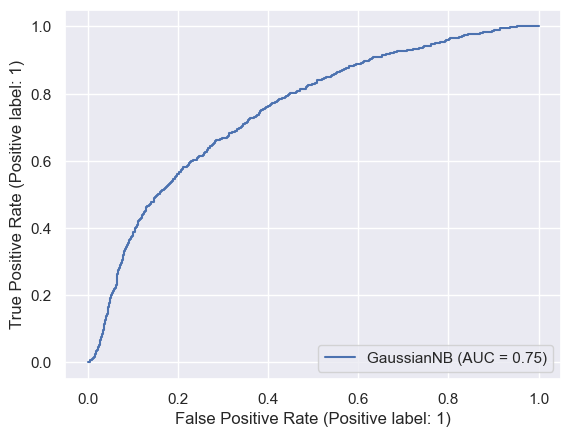

In [121]:
gnb_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

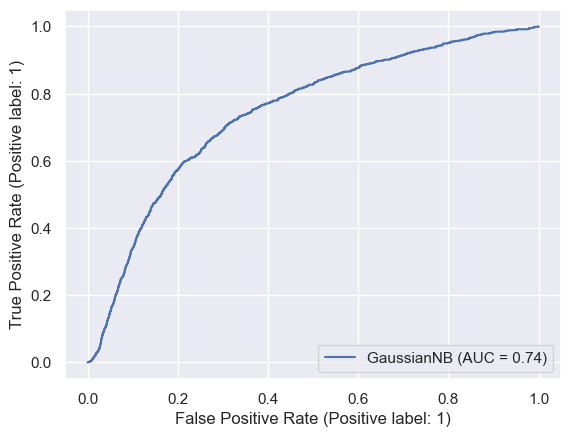

In [122]:
gnb_disp = RocCurveDisplay.from_estimator(gnb, X_train, y_train)

In [123]:
roc_auc_score(y_test, gnb_pred_test, average='macro')

0.5256188207914654

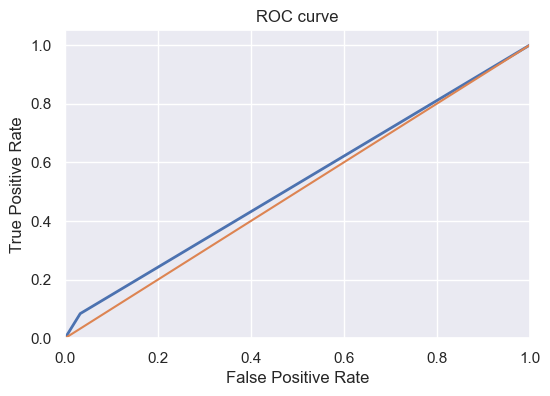

In [140]:
sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, gnb_pred_test, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

## Logistic Regression (Логистическая регрессия)

In [124]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [125]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [126]:
lr_pred_test = lr.predict(X_test)
display(lr_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [127]:
lr_train_predict = lr.predict(X_train)
print('train accuracy: ', accuracy_score(y_train, lr_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, lr_pred_test, normalize=True))

train accuracy:  0.8097014925373134
test accuracy:  0.8115151515151515


In [128]:
lr_accuracy = accuracy_score(y_test, lr_pred_test, normalize=True)

In [129]:
cm = confusion_matrix(y_test, lr_pred_test)
cm

array([[2545,  112],
       [ 510,  133]], dtype=int64)

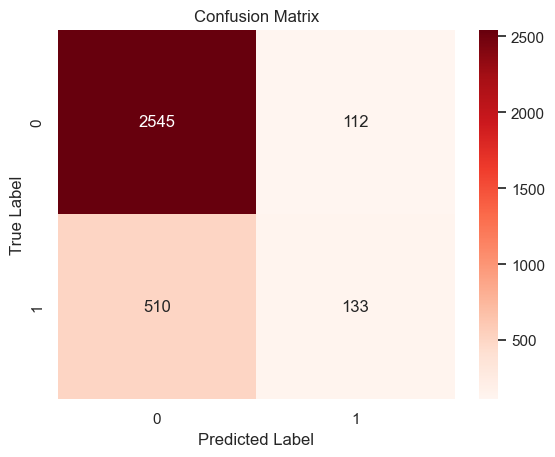

In [130]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [131]:
print('test mean_squared_error: ', mean_squared_error(y_test, lr_pred_test))
print('test mean_absolute_error: ', mean_absolute_error(y_test, lr_pred_test))

test mean_squared_error:  0.18848484848484848
test mean_absolute_error:  0.18848484848484848


In [132]:
print('test precision_score: ', precision_score(y_test, lr_pred_test))

test precision_score:  0.5428571428571428


In [133]:
print('test recall_score: ', recall_score(y_test, lr_pred_test))

test recall_score:  0.20684292379471228


In [134]:
print('test f1_score: ', f1_score(y_test, lr_pred_test))

test f1_score:  0.29954954954954954


In [135]:
print(classification_report( y_test, lr_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2657
           1       0.54      0.21      0.30       643

    accuracy                           0.81      3300
   macro avg       0.69      0.58      0.60      3300
weighted avg       0.78      0.81      0.78      3300



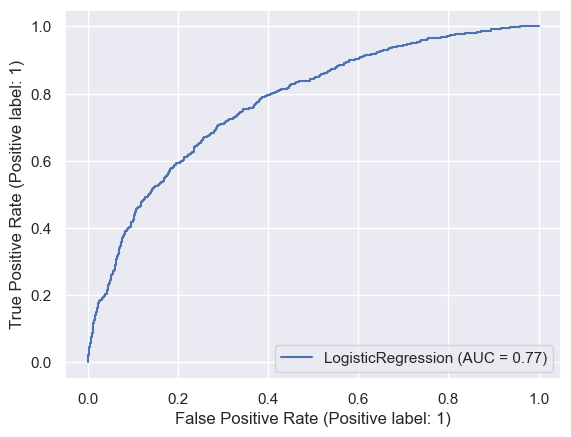

In [136]:
lr_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)

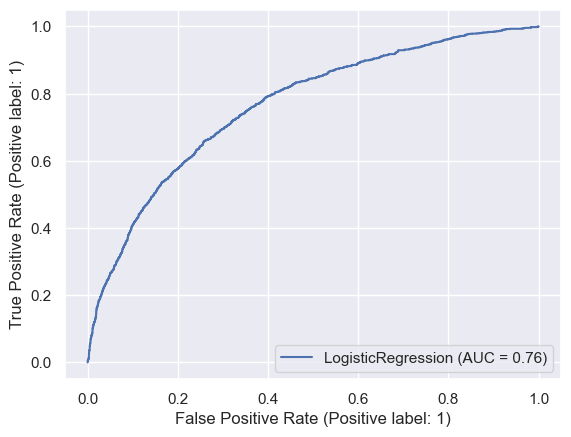

In [137]:
lr_disp = RocCurveDisplay.from_estimator(lr, X_train, y_train)

In [138]:
roc_auc_score(y_test, lr_pred_test, average='macro')

0.5823450599402616

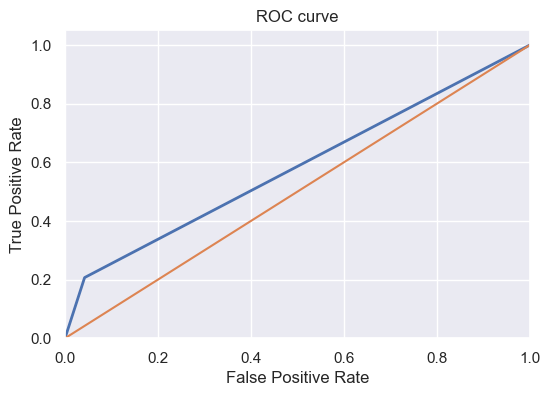

In [139]:
sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_test, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

Вывод

Учитывая дисбаланс 1 и 0, следует обращать внимание на метрики precision, recall, f1-score. Самые высоки значения этих метрих у модели RandomForestClassifier, где Precision: 0.88 (0), 0.80 (1), Recall: 0.97 (0), 0.45 (1), F1-score: 0.58(1) и самая высокая площадь под ROC-кривой. Также она имеет наивысшую точность (accuracy) 0.87.